In [2]:
import os
import time
import pickle
import warnings
import numpy as np
import pandas as pd
from tqdm import tqdm   
import data_cleaner

import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN

import umap

2024-04-13 14:43:57.819801: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-13 14:43:58.619337: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
data = pd.read_csv("/home/tylerc/dat/school/acme/twitter_data.csv", index_col=0)
data = data.sample(5000)
target = np.array(data['target'])
target[target == 4] = 1

In [4]:
# ensure representation
data.groupby('target').count().min(axis=1)

target
0    2511
4    2489
dtype: int64

In [5]:
# clean according to main.py
clean = data_cleaner.word2VecCleaner(data, data_name='twitter', vec_size=300)

# split into one long seq
seqs = list()
targets = list()
for i in range(len(clean)):
    s = clean.iloc[i]['text']
    seqs += s

    for j in s:
        targets.append(target[i])
seqs = np.array(seqs)
targets = np.array(targets)

Word2Vec Model saved as twitter_w2v.model


In [9]:
clean = data_cleaner.word2VecCleaner(data, data_name='twitter', vec_size=500)
clean.iloc[1]

Word2Vec Model saved as twitter_w2v.model


text      [[0.08462316, 0.12052738, 0.13059187, 0.123528...
target                                                    4
Name: 1142599, dtype: object

# UMAP Clustering

In [5]:
# time to cluster
reducer = umap.UMAP()
embed = reducer.fit_transform(seqs)

/home/tylerc/miniconda3/envs/acme/lib/python3.12/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


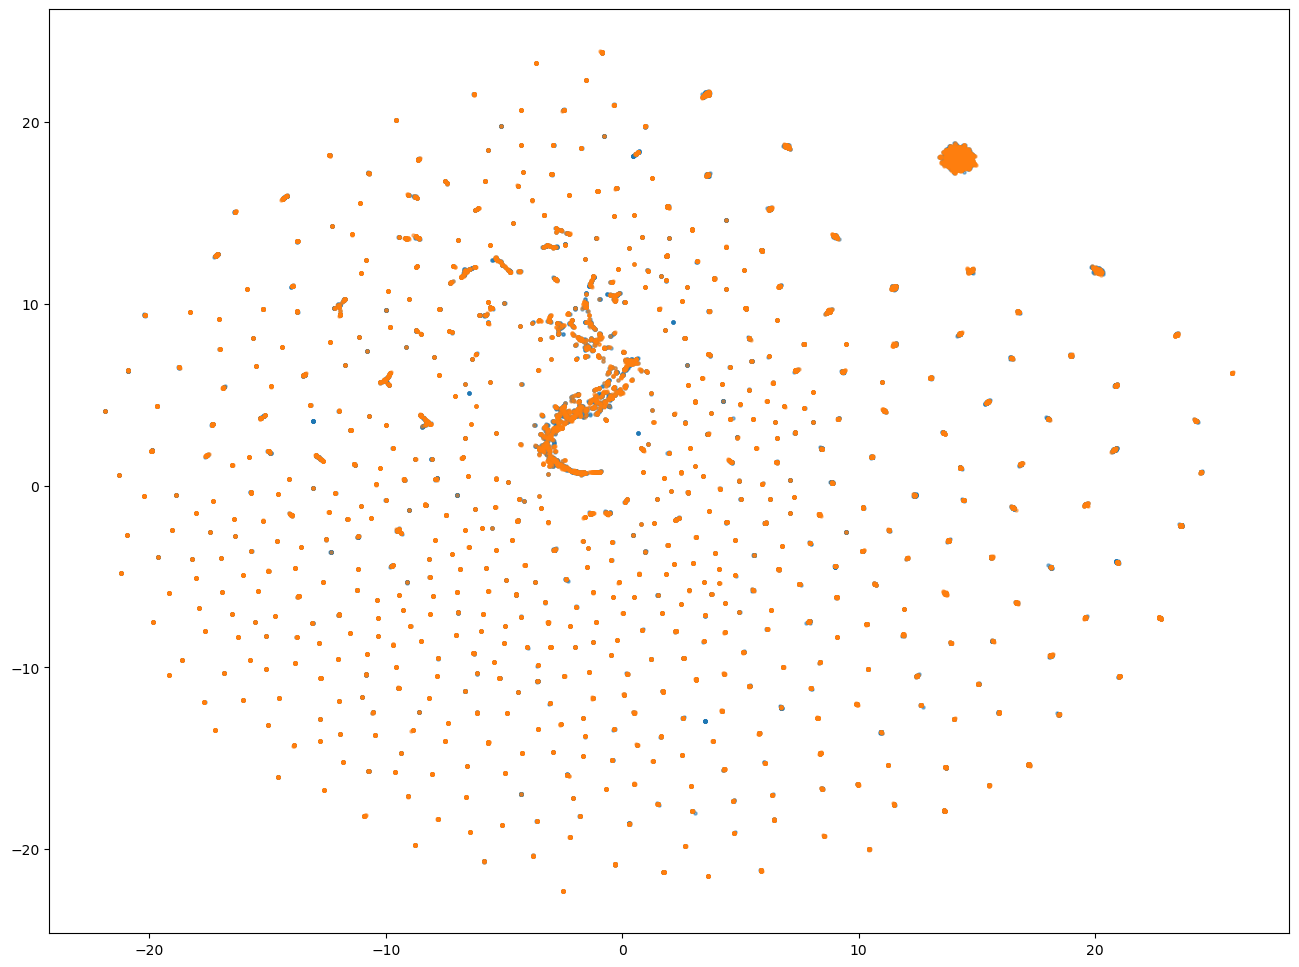

In [6]:
embed0 = embed[targets == 0]
embed1 = embed[targets == 1]

plt.figure(figsize=(16,12))
plt.scatter(embed0[:, 0], embed0[:, 1], s=5, alpha=0.5)
plt.scatter(embed1[:, 0], embed1[:, 1], s=5, alpha=0.5)

plt.show()

# DBSCAN Clustering

In [7]:
m = DBSCAN()
m.fit(seqs)



DBSCAN()

# Parameter Searching

Word2Vec Model saved as twitter_w2v.model


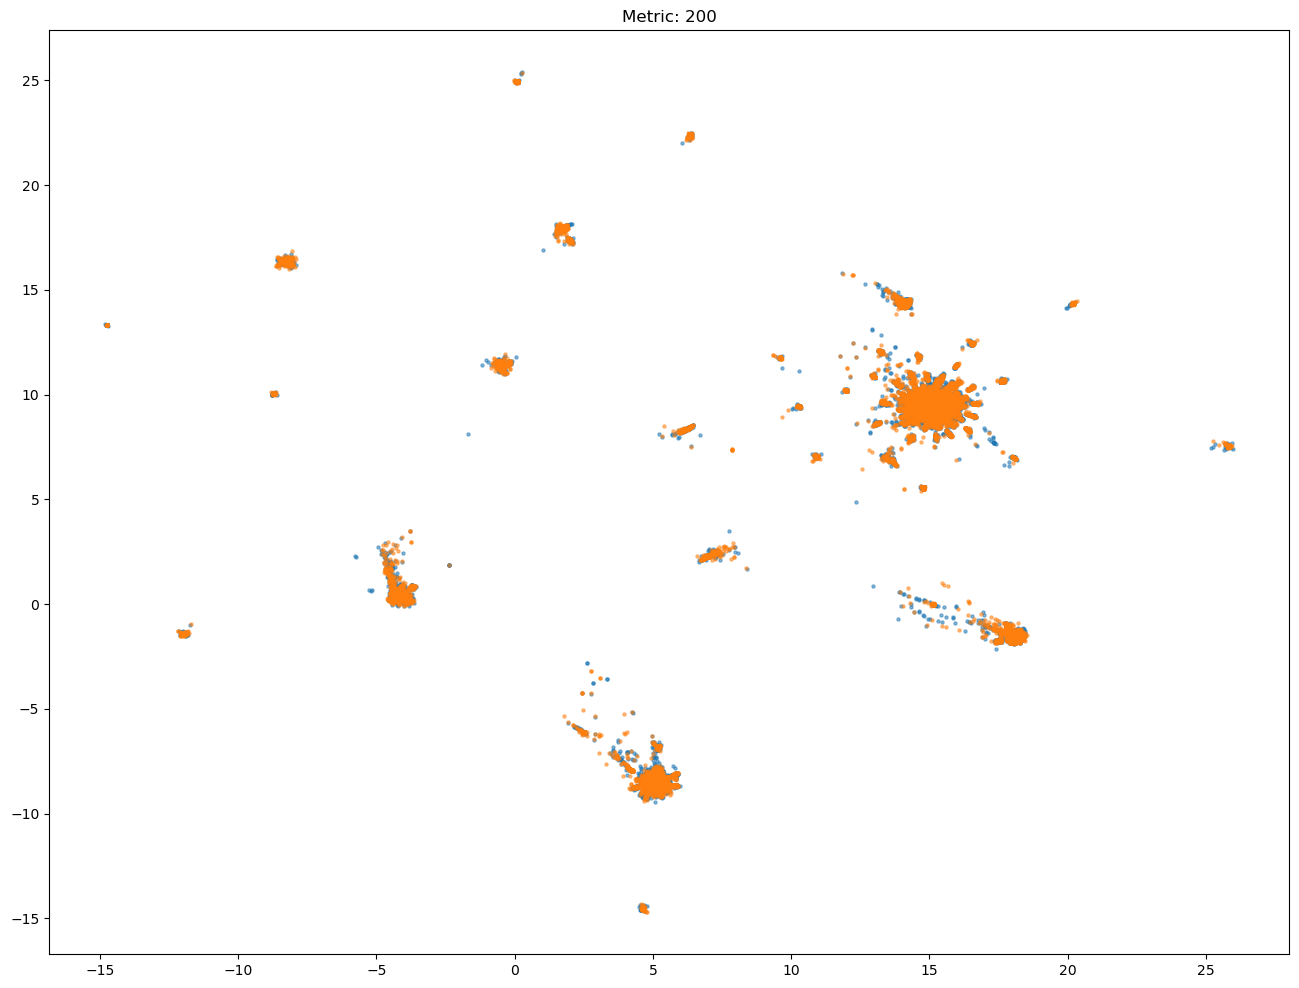

In [8]:
vecs = [200]

# clean according to main.py
clean = data_cleaner.word2VecCleaner(data, data_name='twitter', vec_size=500)
for vs in vecs:    

    # split into one long seq
    seqs = list()
    targets = list()
    for i in range(len(clean)):
        s = clean.iloc[i]['text']
        seqs += s

        for j in s:
            targets.append(target[i])
    seqs = np.array(seqs)
    targets = np.array(targets)

    # time to cluster
    reducer = umap.UMAP(metric='cosine', n_neighbors = vs)
    embed = reducer.fit_transform(seqs)

   

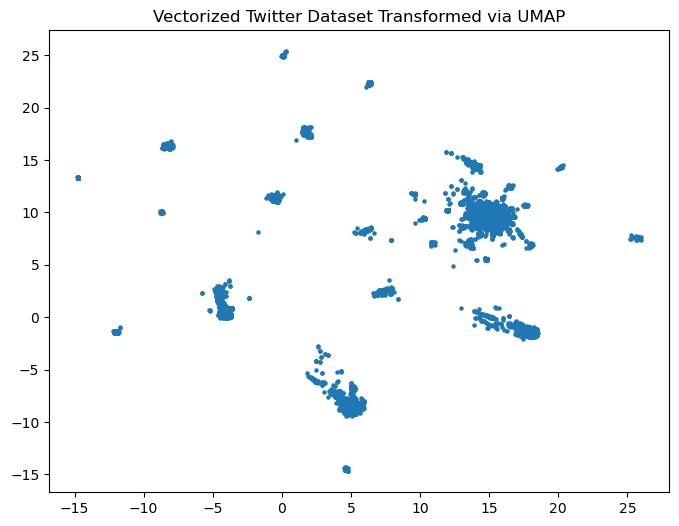

In [26]:
plt.figure(figsize=(8,6))
plt.scatter(embed[:, 0], embed[:, 1], s=5)
plt.title(f"Vectorized Twitter Dataset Transformed via UMAP")
plt.savefig("umap_twitter.png", dpi = 300)
plt.show()

In [27]:
# load cleaned data
with open("twitter_model_data.pkl", "rb") as f:
    dat = pickle.load(f)

dat

,text,target,hmm_data
original_index,,,
1490337,"[6, 6, 3]",4,"[1, 0, 1]"
1225330,"[4, 8]",4,"[1, 0]"
1411372,"[4, 1, 1, 2, 3]",4,"[1, 0, 1, 0, 1]"
346109,"[3, 3, 1, 2, 1, 1, 9, 1, 5, 4, 6, 6, 6]",0,"[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]"
991846,"[4, 3, 7, 6]",4,"[1, 0, 1, 0]"
...,...,...,...
183127,"[1, 0, 0, 4]",0,"[1, 0, 1, 0]"
421638,"[1, 1, 6, 9, 3, 1, 9, 2, 1, 2, 2]",0,"[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]"
1290136,"[8, 4, 6, 3, 3, 1, 1, 2, 6, 5, 8, 2, 1, 0, 1]",4,"[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]"
